### 0. lib and file load

In [18]:
import pandas as pd
import numpy as np

# 시각화 
import matplotlib.pyplot as plt

In [11]:
# 파일을 불러오고 저장할 경로 설정

save_path = '/home/ubuntu2/workspace/JYK/kcit/data/preprocessed'

# 데이터 로드 

train = pd.read_parquet(f'{save_path}/train.parquet')
test = pd.read_parquet(f'{save_path}/test.parquet')
valid = pd.read_parquet(f'{save_path}/valid.parquet')

### 1. fourie transformation 

In [4]:
def FFT(df, col, topn=2):
    fft = np.fft.fft(df[col])
    fft[topn:-topn] = 0
    ifft = np.fft.ifft(fft)
    return ifft

In [26]:
train['수위(mm)_2'] = FFT(train, '수위(mm)', 30)
test['수위(mm)_2'] = FFT(test, '수위(mm)', 30)
valid['수위(mm)_2'] = FFT(valid, '수위(mm)', 30)

원본 데이터와 비교 

In [20]:
plt.figure(figsize=(16, 8))
pd.DataFrame({"original": valid['수위(mm)'], "denoised": valid['수위(mm)_2']}).plot()

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot: xlabel='날짜 및 시간'>

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)


<Figure size 1152x576 with 0 Axes>

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HA

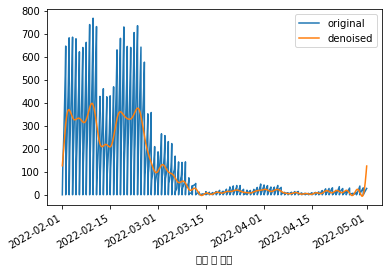

In [22]:
plt.figure(figsize=(16, 8))
pd.DataFrame({"original": test['수위(mm)'], "denoised": test['수위(mm)_2']}).plot()

In [24]:
train

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2021-12-31 23:50:00      71.2   483.7     185.0  19    -9.6         0.0   
2021-12-31 23:40:00      38.7   475.3     147.0  19    -9.5         0.0   
2021-12-31 23:30:00      36.5   468.9     144.0  19    -9.4         0.0   
2021-12-31 23:20:00      61.7   462.4     175.0  19    -9.3         0.0   
2021-12-31 23:10:00      38.7   455.2     147.0  19    -8.6         0.0   
...                       ...     ...       ...  ..     ...         ...   
2019-01-01 00:40:00       1.6     0.7      64.0  19    -6.0         0.0   
2019-01-01 00:30:00       1.1     0.5      61.0  19    -6.0         0.0   
2019-01-01 00:20:00       1.3     0.3      62.0  19    -5.7         0.0   
2019-01-01 00:10:00       1.1     0.1      61.0  19    -5.5         0.0   
2019-01-01 00:00:00       0.8     0.0      58.0  19    -5.3         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)              수위(mm)_2  
날짜 및 시간                                                                
2021-12-31 23:50:00       0.0    142.8      0.8  141.310987+2.173094j  
2021-12-31 23:40:00       0.0    133.2      0.9  141.389664+2.171460j  
2021-12-31 23:30:00       0.0    121.0      0.7  141.468339+2.169824j  
2021-12-31 23:20:00       0.0    139.6      0.9  141.547011+2.168184j  
2021-12-31 23:10:00       0.0    184.7      0.9  141.625681+2.166541j  
...                       ...      ...      ...                   ...  
2019-01-01 00:40:00       0.0     36.1      0.0  140.917572+2.181214j  
2019-01-01 00:30:00       0.0    283.8      0.0  140.996259+2.179596j  
2019-01-01 00:20:00       0.0     76.7      0.7  141.074944+2.177975j  
2019-01-01 00:10:00       0.0     90.1      0.0  141.153627+2.176351j  
2019-01-01 00:00:00       0.0     88.0      0.5  141.232308+2.174724j  

[157682 rows x 10 columns]

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot: xlabel='날짜 및 시간'>

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)


<Figure size 1152x576 with 0 Axes>

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HA

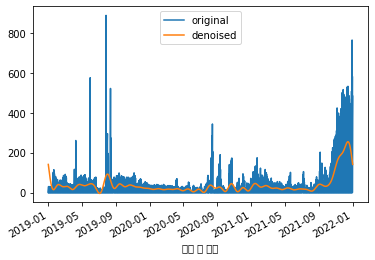

In [19]:
plt.figure(figsize=(16, 8))
pd.DataFrame({"original": train['수위(mm)'], "denoised": train['수위(mm)_2']}).plot()